In [1]:
import gym
import numpy as np
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt
import random

In [2]:
env = gym.make('Roulette-v0')

action_space_size = env.action_space.n
state_space_size = env.observation_space.n
print(f"Number of actions available: {action_space_size}")
print(f"Number of states defined: {state_space_size}")
print(f"Therefore, Q-Table with {action_space_size} columns and {state_space_size} rows will be created")

C:\Users\ANOMITRO\anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Number of actions available: 38
Number of states defined: 1
Therefore, Q-Table with 38 columns and 1 rows will be created


In [3]:
q_table = np.random.random([state_space_size, action_space_size])
# OR
# q_table = np.zeros([state_space_size, action_space_size])
print(f"Q-Table shape: {q_table.shape}")

sleep(5)

# Hyperparameters
TOTAL_EPISODES = 5_000  # Number of epsiodes to train the algorithm
MAX_STEPS = 150  # Max steps an agent can take during an episode

LEARNING_RATE = 0.1
GAMMA = 0.95  # Discount (close to 0 makes it greedy, close to 1 considers long term)

# Exploration Parameters
epsilon = 1
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = TOTAL_EPISODES // 2
DECAY_RATE = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)

Q-Table shape: (1, 38)


In [4]:
def print_frames(frames):
    total_reward = 0
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print('\n*********************')
        print(f"Episode: {frame['episode']}")
        print(f'Round: {i + 1}')
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        total_reward += frame['reward']
        print(f"Total reward so far: {total_reward}")
        sleep(0.1)

In [5]:
def edit_reward(info):
    print(info)

In [6]:
env.reset()
history = {'steps': [], 'total_score': [], 'episode_number': []}
best_frames = []
high_score = 0

for episode in range(TOTAL_EPISODES):

    state = env.reset()
    step = 0
    frames = []
    current_score = 0
    done = False

    for step in range(MAX_STEPS):

        if np.random.random() > epsilon:  # This is exploitation
            action = np.argmax(q_table[state, :])  # Current state, max value
        else:  # This is exploration
            action = np.random.randint(0, action_space_size)

        new_state, reward, done, info = env.step(action)

        current_score += reward

        frames.append({
            'episode': episode,
            'action': action,
            'reward': reward
        })

        q_table[state, action] = (1 - LEARNING_RATE) * q_table[state, action] + LEARNING_RATE * (
                    reward + GAMMA * np.max(q_table[new_state, :]))

        if done:

            history['steps'].append(step + 1)
            history['total_score'].append(current_score)
            history['episode_number'].append(episode)

            if current_score >= high_score:
                high_score = current_score
                best_frames = frames.copy()
            break

        state = new_state

    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= DECAY_RATE

env.close()
print_frames(best_frames)
print(f"\nQ-Table after {TOTAL_EPISODES} episodes")
print(q_table)
print(f'The best score after running {TOTAL_EPISODES} episodes: {high_score}')


*********************
Episode: 1476
Round: 100
Action: 2
Reward: -1.0
Total reward so far: 167.0

Q-Table after 5000 episodes
[[-9.16472615e-03 -6.73955714e-02 -6.20403065e-02 -9.31633690e-02
  -5.94999328e-02 -4.57839207e-02 -5.96123040e-02 -2.64645507e-02
  -7.89425135e-02 -7.59117912e-02 -4.02495601e-02 -2.78277818e-02
  -4.98834426e-02 -6.06709610e-02 -3.80949452e-02 -2.95379429e-02
  -7.30584224e-03 -5.01987858e-04 -8.78720649e-02 -4.61491725e-02
  -7.24261336e-02 -3.61037686e-02 -8.55680682e-02 -8.25734071e-02
  -4.48240683e-03 -3.59963367e-02 -3.88370342e-02 -6.29424818e-02
  -5.37211472e-02 -2.59714621e-04 -9.75412311e-02 -6.72547621e-02
  -5.37478204e-02 -6.82541097e-02 -8.29826656e-02 -3.13796553e-02
  -3.30938746e-02  1.14722166e-06]]
The best score after running 5000 episodes: 167.0


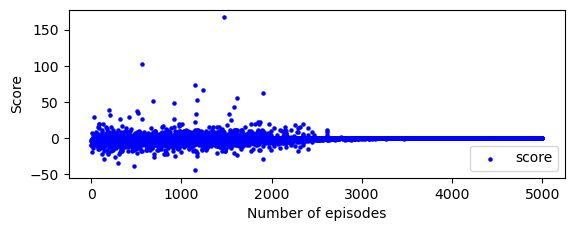

In [7]:
# Total score
plt.subplot(2, 1, 1)
plt.scatter(history['episode_number'], history['total_score'], s=5, label='score', color='blue')
plt.xlabel('Number of episodes')
plt.ylabel('Score')
plt.legend(loc=4)

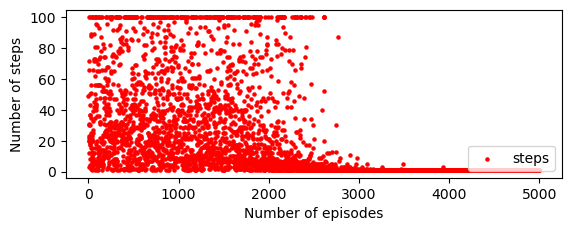

In [8]:
# Number of steps
plt.subplot(2, 1, 2)
plt.scatter(history['episode_number'], history['steps'], s=5, label='steps', color='red')
plt.xlabel('Number of episodes')
plt.ylabel('Number of steps')
plt.legend(loc=4)
plt.show()